# Dengue Fever is a mosquito-borne viral infection that causes fever, rash, headache, and muscle pain. It is most common in tropical and sub-tropical regions, where climate conditions support mosquito populations.

In [39]:
import pandas as pd
import numpy as np
train = pd.read_csv('dengue_features_train.csv')
train = train.drop(['city','year','week_start_date'],axis=1)
train = train.fillna(train.mean())
labels = pd.read_csv('dengue_labels_train.csv')
labels = labels.fillna(labels.mean())
train.head()

C:\Users\bg\AppData\Local\Temp\ipykernel_20616\4142510930.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  labels = labels.fillna(labels.mean())


,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


Divide the training data into a training set (80% of the data) and a validation set (20%) *Hint: make sure you do these the same way for the features and labels*. You will use the validation set to compare performance across models. 

In [40]:
from sklearn.model_selection import train_test_split
training_set, validation_set, training_labels, validation_labels = train_test_split(train, labels, test_size = 0.2)
print(train.shape)
print(training_set.shape)
print(validation_set.shape)

(1456, 21)
(1164, 21)
(292, 21)


In [41]:
print(training_labels.shape)
print(validation_labels.shape)

(1164, 4)
(292, 4)


Train a linear regression model on the training data and evaluate its performance on the validation set according to the mean absolute error. Make a scatter plot of the predicted and true case counts for the validation set.  


Mean Absolute Error on Validation Set: 20.42


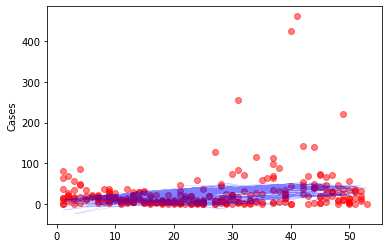

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(training_set, training_labels['total_cases'])

y_val_pred = model.predict(validation_set)
mae = mean_absolute_error(validation_labels['total_cases'], y_val_pred)
print("Mean Absolute Error on Validation Set: {:.2f}".format(mae))

plt.scatter(validation_set['weekofyear'], validation_labels['total_cases'], color = 'r', alpha=0.5)
plt.plot(validation_set['weekofyear'], y_val_pred, color="b", linewidth=0.2, alpha = 0.5)
plt.ylabel("Cases")
plt.show()

##  Use [scikit-learn's Poisson GLM method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html) on this data. Report mean absolute error on the validation set. Explain why this model is more appropriate than linear regression for this task. 


In [35]:
from sklearn import linear_model
model2 = linear_model.PoissonRegressor()
model2.fit(training_set, training_labels['total_cases'].to_numpy().ravel())

y_val_pred2 = model2.predict(validation_set)
mae2 = mean_absolute_error(validation_labels['total_cases'], y_val_pred2)
print("Mean Absolute Error on Validation Set: {:.2f}".format(mae2))

Mean Absolute Error on Validation Set: 7.63


C:\Users\bg\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


The Poisson Regressor is a more appropraite for this task because the task is to predict the number of cases of Dengue Fever in a given time interval. This scenario aligns with the general purpose of a Poisson distribution which is to predict the number of events that occur within a certain interval of time or space.

Train an artificial neural network to perform this task. Try out at least 3 different depths (number of hidden layers) and 3 different widths (number of units in each layer). Pick the model that performs the best on the validation set and upload its predictions on the test set to the DataDriven competition page according to the provided submission format. Include a screenshot of your performance. Do the same for the model that performed the worst on the validation set. Does validation performance relate to test performance for you?

*Note: the submission requires total_cases be an integer*

In [44]:
from sklearn.neural_network import MLPRegressor
test = pd.read_csv('dengue_features_test.csv')
test1 = test[['city', 'year', 'weekofyear']]
test = test.drop(['city','year','week_start_date'], axis=1)
test = test.fillna(test.mean())
#Create models
mlp1 = MLPRegressor(hidden_layer_sizes=(5, 2))
mlp2 = MLPRegressor(hidden_layer_sizes=(10, 2))
mlp3 = MLPRegressor(hidden_layer_sizes=(2, 8))

# Train the model on the training data
mlp1.fit(training_set, training_labels['total_cases'].to_numpy().ravel())
mlp2.fit(training_set, training_labels['total_cases'].to_numpy().ravel())
mlp3.fit(training_set, training_labels['total_cases'].to_numpy().ravel())

# Make predictions on the test data
predictions1 = mlp1.predict(test)
predictions2 = mlp2.predict(test)
predictions3 = mlp3.predict(test)

# Print the mean squared error of the predictions
test1['total_cases'] = predictions1.astype(int)
test1.to_csv('pred1.csv', index = False)
test1['total_cases'] = predictions2.astype(int)
test1.to_csv('pred2.csv', index = False)
test1['total_cases'] = predictions3.astype(int)
test1.to_csv('pred3.csv', index = False)

C:\Users\bg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


First model 
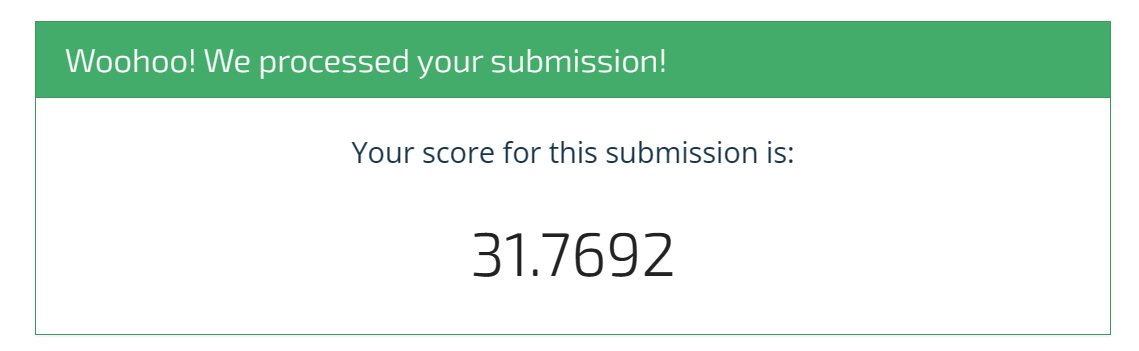

Second model
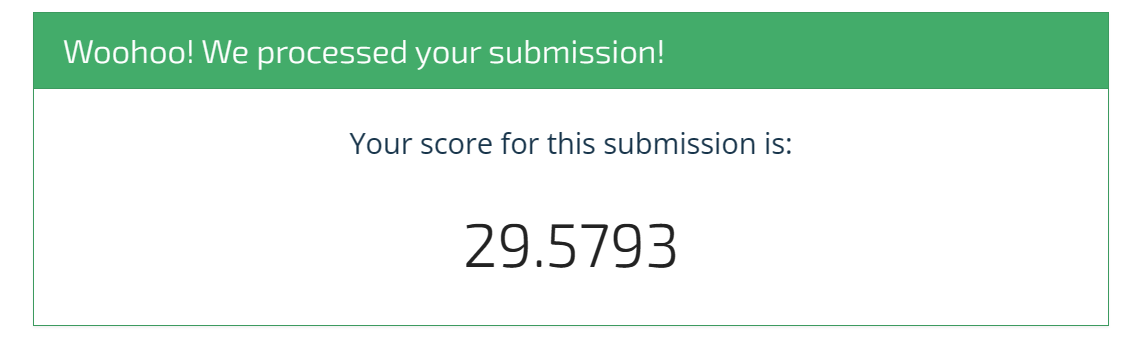

Third model

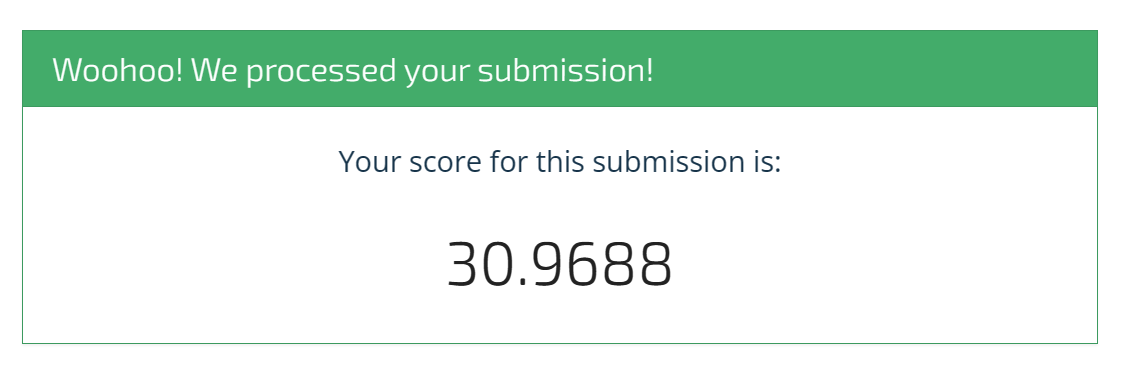

Yes, validation perfromance relates to test performance. The second model performed the best while the third model performed the worst according to MAE.